In [7]:
import tensorflow as tf
import keras as ke
import numpy as np
import matplotlib.pyplot as plt

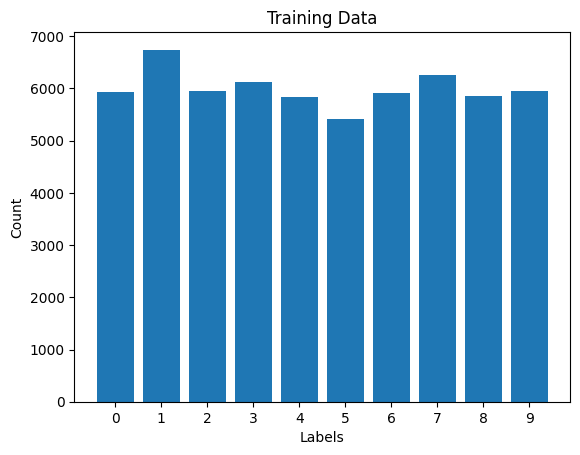

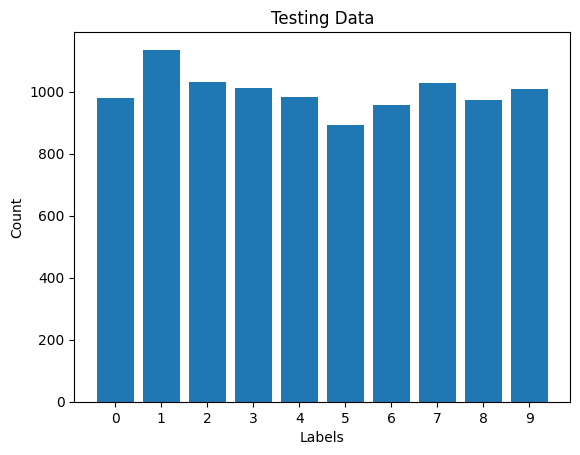

In [8]:
(x_train, y_train), (x_test, y_test) = ke.datasets.mnist.load_data()

def plotBar(data, title):
    plt.title(title)
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.bar(range(len(data)), data.values(), align="center")
    plt.xticks(range(len(data)), list(data.keys()))
    plt.show()

unique, counts = np.unique(y_train, return_counts=True)
plotBar(dict(zip(unique, counts)),'Training Data')

unique, counts = np.unique(y_test, return_counts=True)
plotBar(dict(zip(unique, counts)), 'Testing Data')


In [9]:
yTrain = ke.utils.to_categorical(y_train)
yTest = ke.utils.to_categorical(y_test)

total_pixels = x_train.shape[1] * x_train.shape[1]

x_train = np.reshape(x_train, [-1, total_pixels])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, total_pixels])
x_test = x_test.astype('float32') / 255


In [10]:
from keras import layers as lr

network = ke.models.Sequential()

network.add(lr.Dense(256, input_dim=total_pixels))
network.add(lr.Activation('tanh'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('tanh'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('tanh'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(256))
network.add(lr.Activation('tanh'))

network.add(lr.Dropout(0.45))
network.add(lr.Dense(10))
network.add(lr.Activation('softmax'))
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               200960    
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)              

In [11]:
network.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [12]:
network.fit(x_train, yTrain, epochs=50, batch_size=128)

Epoch 1/50
469/469 [==============================] - 4s 7ms/step - loss: 0.5462 - accuracy: 0.8307
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3433 - accuracy: 0.8998
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2846 - accuracy: 0.9163
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2486 - accuracy: 0.9255
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.2275 - accuracy: 0.9329
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.2080 - accuracy: 0.9386
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1936 - accuracy: 0.9431
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1809 - accuracy: 0.9463
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1746 - accuracy: 0.9492
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1660 - accuracy: 0.9516

In [13]:
loss, acc = network.evaluate(x_test, yTest, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9781

Test accuracy: 97.8%
